In [1]:
## import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, DBSCAN, Birch, AffinityPropagation, MeanShift, OPTICS
from sklearn.mixture import GaussianMixture



## carregar o ficheiro de jogos para um dataframe do pandas
data = pd.read_csv('../files/View_data_nullZero.csv')



data.head(2)     #Mostra as primeiras n linhas do conjunto de dados
data.tail(5)     #Mostra as últimas n linhas do conjunto de dados


,id_match_competition,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,...,t1_h2h_home_total10_fl_match_win,t1_h2h_home_total10_fl_match_draw,t1_h2h_home_total10_fl_match_lost,t2_h2h_away_total5_fl_match_win,t2_h2h_away_total5_fl_match_draw,t2_h2h_away_total5_fl_match_lost,t2_h2h_away_total10_fl_match_win,t2_h2h_away_total10_fl_match_draw,t2_h2h_away_total10_fl_match_lost,t1_fl_match_win
43818,1069,1,4,0,3,6,1,3,1,1,...,0,1,0,0,1,0,0,1,0,0
43819,243,2,1,2,4,2,4,2,1,2,...,0,0,0,0,0,0,0,0,0,1
43820,214,1,3,1,5,3,2,3,0,2,...,2,2,0,0,2,2,0,2,2,1
43821,257,1,1,3,1,4,5,1,2,2,...,1,2,2,2,2,1,2,2,1,0
43822,8613,3,2,0,7,2,1,4,0,1,...,0,0,1,1,0,0,1,0,0,0


In [2]:
data.shape

(43823, 50)

In [3]:
x = data.iloc[:,1:50] # 1t for rows and second for columns
x


,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,t2_all_total10_fl_match_win,...,t1_h2h_home_total10_fl_match_win,t1_h2h_home_total10_fl_match_draw,t1_h2h_home_total10_fl_match_lost,t2_h2h_away_total5_fl_match_win,t2_h2h_away_total5_fl_match_draw,t2_h2h_away_total5_fl_match_lost,t2_h2h_away_total10_fl_match_win,t2_h2h_away_total10_fl_match_draw,t2_h2h_away_total10_fl_match_lost,t1_fl_match_win
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43818,1,4,0,3,6,1,3,1,1,3,...,0,1,0,0,1,0,0,1,0,0
43819,2,1,2,4,2,4,2,1,2,2,...,0,0,0,0,0,0,0,0,0,1
43820,1,3,1,5,3,2,3,0,2,5,...,2,2,0,0,2,2,0,2,2,1
43821,1,1,3,1,4,5,1,2,2,4,...,1,2,2,2,2,1,2,2,1,0


<AxesSubplot:ylabel='t1_h2h_home_total5_fl_match_lost'>

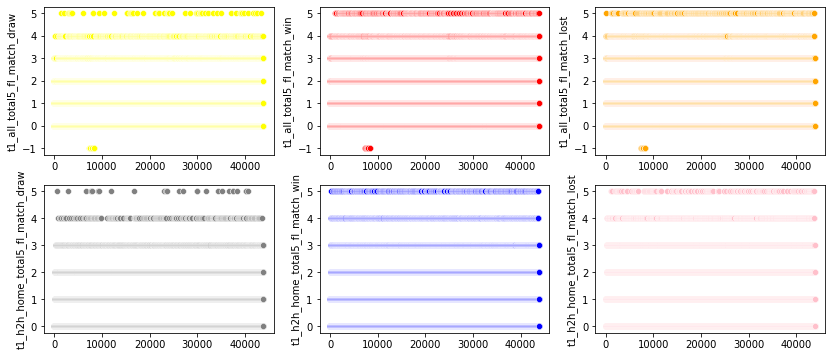

In [4]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sns.scatterplot(x=data.index, y='t1_all_total5_fl_match_win', data=data, ax=ax[0][1], color='red')
sns.scatterplot(x=data.index, y='t1_all_total5_fl_match_draw', data=data, ax=ax[0][0], color= 'yellow')
sns.scatterplot(x=data.index, y='t1_all_total5_fl_match_lost', data=data, ax=ax[0][2], color= 'orange')
sns.scatterplot(x=data.index, y='t1_h2h_home_total5_fl_match_win', data=data, ax=ax[1][1], color= 'blue')
sns.scatterplot(x=data.index, y='t1_h2h_home_total5_fl_match_draw', data=data, ax=ax[1][0], color= 'grey')
sns.scatterplot(x=data.index, y='t1_h2h_home_total5_fl_match_lost', data=data, ax=ax[1][2], color= 'pink')


Text(0, 0.5, 'WCSS')

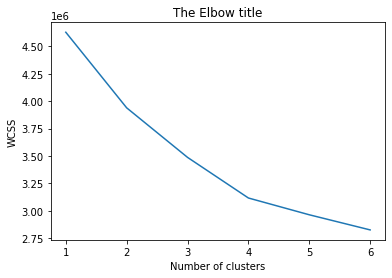

In [5]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [6]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 2, 0, 1], dtype=int32)

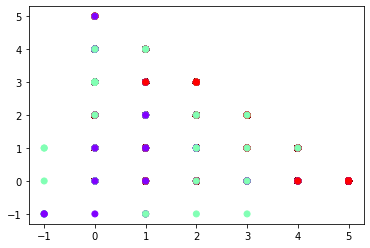

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['t1_all_total5_fl_match_win'],data_with_clusters['t1_all_total5_fl_match_draw'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [9]:
x = data.drop('t1_fl_match_win', axis=1)
y = data.t1_fl_match_win

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_balanced)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2']).values

In [10]:
principalDf = pd.DataFrame(principalDf)

finalDf = pd.concat([principalDf, y_balanced], axis = 1).values

finalDf

array([[-3.34918335,  1.26916628,  1.        ],
       [-4.30480583,  1.40072547,  0.        ],
       [ 3.34660762, -5.46890621,  0.        ],
       ...,
       [-2.12558919,  0.89337798,  1.        ],
       [-4.13192237,  0.55595779,  1.        ],
       [ 4.86931314,  1.24731556,  1.        ]])

In [11]:
#show graph
def showgraph():
    plt.scatter(finalDf[y_kmeans == 0, 0], finalDf[y_kmeans == 0, 1], s = 0.5, c = 'red', label = 'Cluster 1')
    plt.scatter(finalDf[y_kmeans == 1, 0], finalDf[y_kmeans == 1, 1], s = 0.5, c = 'blue', label = 'Cluster 2')
    plt.scatter(finalDf[y_kmeans == 2, 0], finalDf[y_kmeans == 2, 1], s = 0.5, c = 'green', label = 'Cluster 3')
    plt.scatter(finalDf[y_kmeans == 3, 0], finalDf[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Cluster 4')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
    plt.title('Clustering')
    plt.legend()

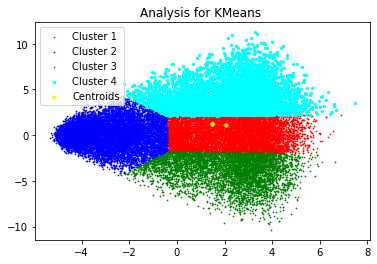

In [12]:
#K-means clustering algorithm
clusteringmodel = KMeans(n_clusters= 4)
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()

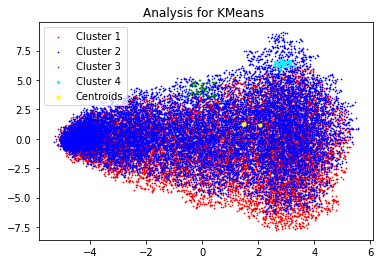

In [13]:
#DBSCAN clustering algorithm
clusteringmodel = DBSCAN(eps=0.25, min_samples=9)
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()

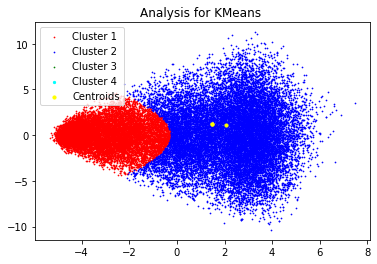

In [14]:
#Gaussian Mixture clustering algorithm
clusteringmodel = GaussianMixture(n_components=2)
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()

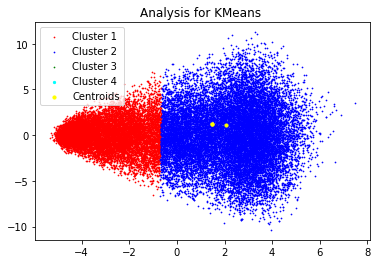

In [15]:
#Mean-Shift  algorithm
clusteringmodel = MeanShift()
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()

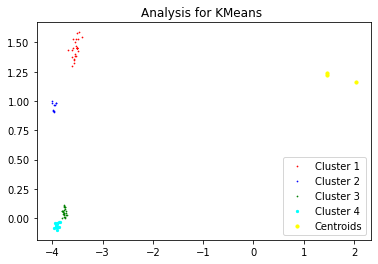

In [16]:
#OPTICS algorithm
clusteringmodel = OPTICS(eps=0.75, min_samples=10)
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()

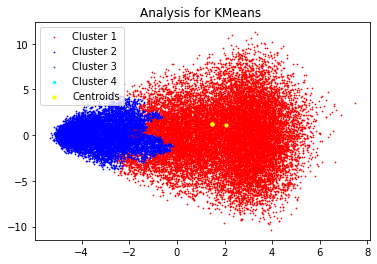

In [17]:
#Agglomerative Hierarchy
clusteringmodel = AgglomerativeClustering(n_clusters=2)
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()

#more than 16gb ram to run
#BIRCH clustering algorithm
clusteringmodel = Birch(threshold=0.03, n_clusters=2)
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()

#more than 16gb ram to run
#Affinity Propagation algorithm
clusteringmodel = AffinityPropagation(damping=0.7)
y_kmeans= clusteringmodel.fit_predict(finalDf)
showgraph()